<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Download historical stock data for Tesla
tesla_stock_data = tesla_ticker.history(period="max")

# Reset the index to move the Date column out of the index
tesla_stock_data.reset_index(inplace=True)

# Display the first few rows of the stock data
print(tesla_stock_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
import yfinance as yf

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Extract historical stock data for Tesla with the maximum available period
tesla_data = tesla_ticker.history(period="max")

# Reset the index to ensure 'Date' is a column
tesla_data.reset_index(inplace=True)

# Display the first few rows of the DataFrame
print(tesla_data.head())

# Optional: Check the structure of the DataFrame
print(tesla_data.info())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3654 non-null   datetime64[ns, America/New_York]
 1   Open          3654

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
# Reset the index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())

   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Display the first 500 characters of the html_data (optional, for verification)
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [9]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup with 'html.parser'
soup = BeautifulSoup(html_data, "html.parser")

# Optional: Display the first few characters of the parsed HTML
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [31]:
import pandas as pd
from bs4 import BeautifulSoup

# Assuming `html_data` is already loaded as shown in the earlier steps
soup = BeautifulSoup(html_data, "html.parser")

# Locate the table containing Tesla Revenue data
table = soup.find_all("tbody")[1]  # The second <tbody> contains the Tesla revenue data

# Create an empty list to collect rows of data
data = []

# Iterate through the rows of the table
for row in table.find_all("tr"):
    # Extract columns (Date and Revenue)
    columns = row.find_all("td")
    if len(columns) > 1:  # Ensure the row has enough columns
        date = columns[0].text.strip()  # Extract and clean the Date column
        revenue = columns[1].text.strip()  # Extract and clean the Revenue column
        
        # Append the row to the data list
        data.append({"Date": date, "Revenue": revenue})

# Create the DataFrame from the list of dictionaries
tesla_revenue = pd.DataFrame(data)

# Display the first few rows of the DataFrame (optional)
print("This is tesla_revenue tail")
print(tesla_revenue.tail())



This is tesla_revenue tail
          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31        
52  2009-09-30     $46
53  2009-06-30     $27


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [12]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [13]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [14]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [17]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gamestop_ticker = yf.Ticker("GME")

# Extract historical stock data for GameStop
gamestop_data = gamestop_ticker.history(period="max")


# Display the first few rows of the DataFrame
print(gamestop_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [19]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")  # Ensure this line is included to define the ticker object

# Extract historical stock data for the maximum period and save to gme_data
gme_data = gme_ticker.history(period="max")

# Display the first few rows of gme_data
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for the maximum period and save it in gme_data
gme_data = gme_ticker.history(period="max")

# Reset the index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [33]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data_2 = response.text

# Display the first 500 characters of the html_data_2 (optional, for verification)
print(html_data_2[:500])
print(gme_revenue.tail())


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g
          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [22]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup with 'html.parser'
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Optional: Display the first few lines of the parsed HTML for verification
print(soup_2.prettify()[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [23]:
import pandas as pd
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Locate the table containing GameStop Revenue data
table = soup_2.find_all("tbody")[1]  # The second <tbody> is assumed to contain the GameStop revenue data

# Create an empty list to collect rows of data
data = []

# Iterate through the rows of the table
for row in table.find_all("tr"):
    # Extract columns (Date and Revenue)
    columns = row.find_all("td")
    if len(columns) > 1:  # Ensure the row has enough columns
        date = columns[0].text.strip()  # Extract and clean the Date column
        revenue = columns[1].text.strip()  # Extract and clean the Revenue column
        
        # Append the row to the data list
        data.append({"Date": date, "Revenue": revenue})

# Create the DataFrame from the list of dictionaries
gme_revenue = pd.DataFrame(data)

# Clean the Revenue column: remove commas and dollar signs, and convert to numeric
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({"\$": "", ",": ""}, regex=True)
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")  # Convert to numeric, set errors to NaN

# Display the first few rows of the DataFrame
print(gme_revenue.head())


         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [25]:
print(gme_revenue.head())
print(gme_revenue.tail())

         Date  Revenue
0  2020-04-30     1021
1  2020-01-31     2194
2  2019-10-31     1439
3  2019-07-31     1286
4  2019-04-30     1548
          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


/tmp/ipykernel_901/826375330.py:24: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_901/826375330.py:34: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



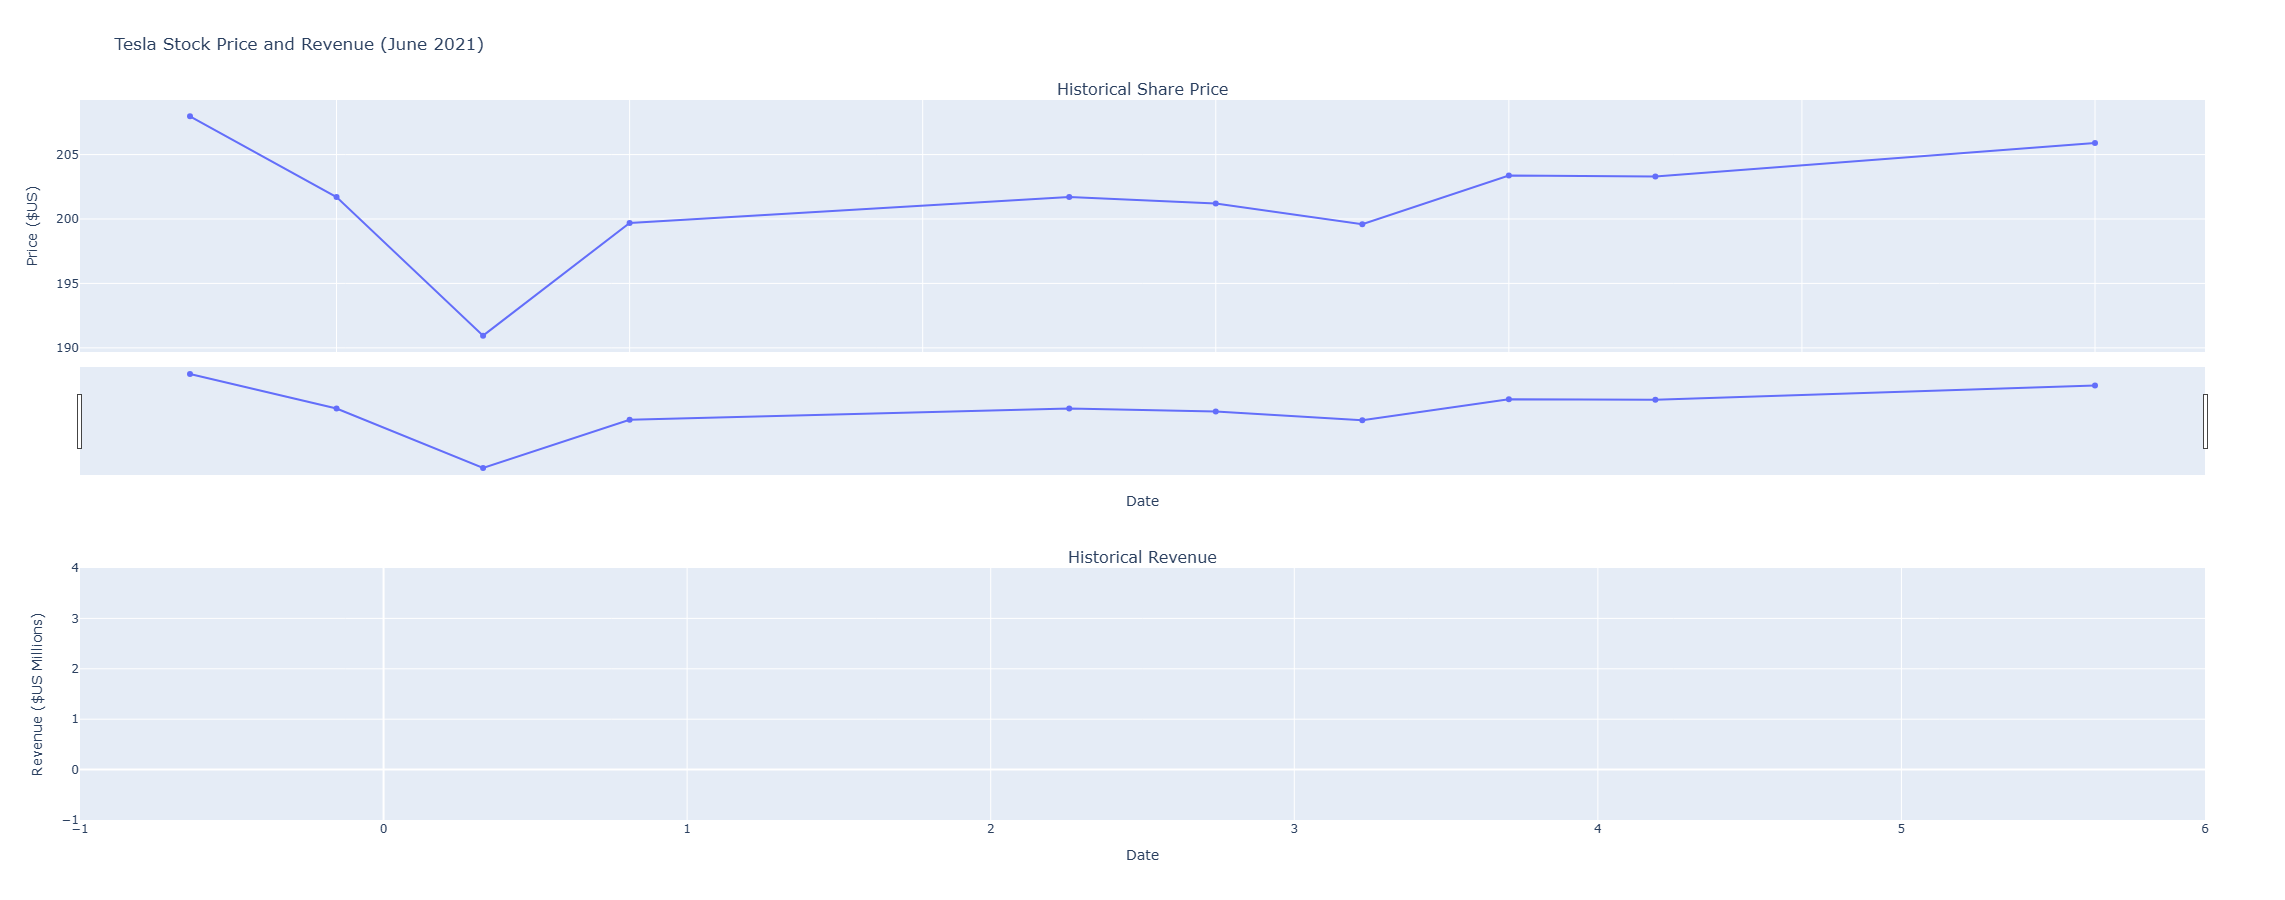

In [37]:
# Ensure the Date column is in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter the data to only include June 2021
tesla_data_filtered = tesla_data[(tesla_data['Date'] >= '2021-06-01') & (tesla_data['Date'] <= '2021-06-30')]
tesla_revenue_filtered = tesla_revenue[(tesla_revenue['Date'] >= '2021-06-01') & (tesla_revenue['Date'] <= '2021-06-30')]

# Use the make_graph function to plot the filtered data
make_graph(tesla_data_filtered, tesla_revenue_filtered, "Tesla Stock Price and Revenue (June 2021)")


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [43]:
# Filter the gme_data and gme_revenue DataFrames for June 2021
gme_data_filtered = gme_data[(gme_data['Date'] >= '2021-06-01') & (gme_data['Date'] <= '2021-06-30')]
gme_revenue_filtered = gme_revenue[(gme_revenue['Date'] >= '2021-06-01') & (gme_revenue['Date'] <= '2021-06-30')]

# Print filtered data for June 2021
print("GameStop Stock Data for June 2021:")
print(gme_data_filtered)

print("\nGameStop Revenue Data for June 2021:")
print(gme_revenue_filtered)



GameStop Stock Data for June 2021:
                          Date       Open       High        Low      Close  \
4857 2021-06-01 00:00:00-04:00  58.369999  63.744999  56.767502  62.255001   
4858 2021-06-02 00:00:00-04:00  62.220001  73.500000  61.075001  70.559998   
4859 2021-06-03 00:00:00-04:00  66.427498  68.607498  60.529999  64.544998   
4860 2021-06-04 00:00:00-04:00  64.004997  66.250000  61.442501  62.090000   
4861 2021-06-07 00:00:00-04:00  64.500000  70.500000  63.799999  70.002502   
4862 2021-06-08 00:00:00-04:00  73.000000  86.165001  70.250000  75.000000   
4863 2021-06-09 00:00:00-04:00  75.779999  82.000000  72.877502  75.639999   
4864 2021-06-10 00:00:00-04:00  70.500000  72.000000  52.750000  55.097500   
4865 2021-06-11 00:00:00-04:00  55.587502  60.282501  51.532501  58.334999   
4866 2021-06-14 00:00:00-04:00  59.125000  59.502499  54.799999  57.360001   
4867 2021-06-15 00:00:00-04:00  56.590000  57.312500  52.000000  55.625000   
4868 2021-06-16 00:00:00-04:0

/tmp/ipykernel_901/826375330.py:24: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_901/826375330.py:34: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



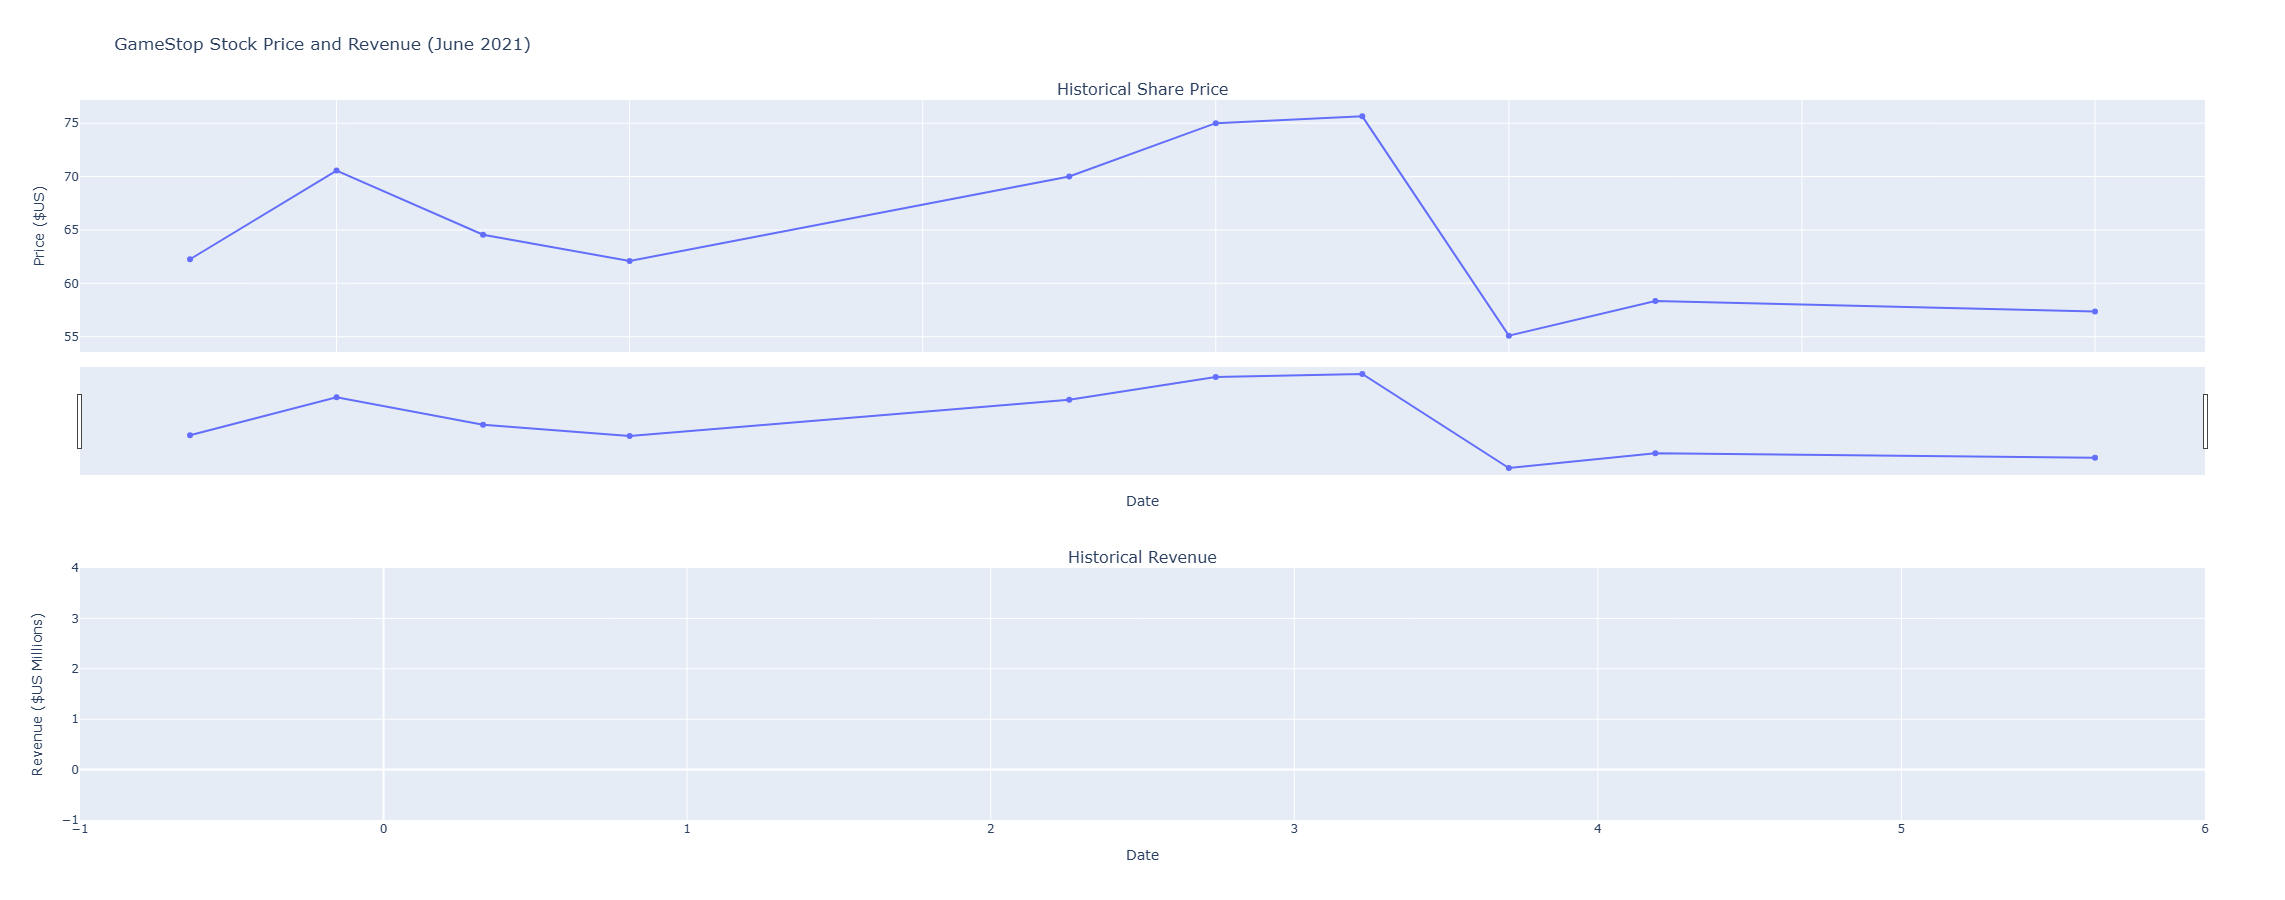

In [44]:
# Use the make_graph function to plot the GameStop data for June 2021
make_graph(gme_data_filtered, gme_revenue_filtered, "GameStop Stock Price and Revenue (June 2021)")


/tmp/ipykernel_901/826375330.py:24: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_901/826375330.py:34: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



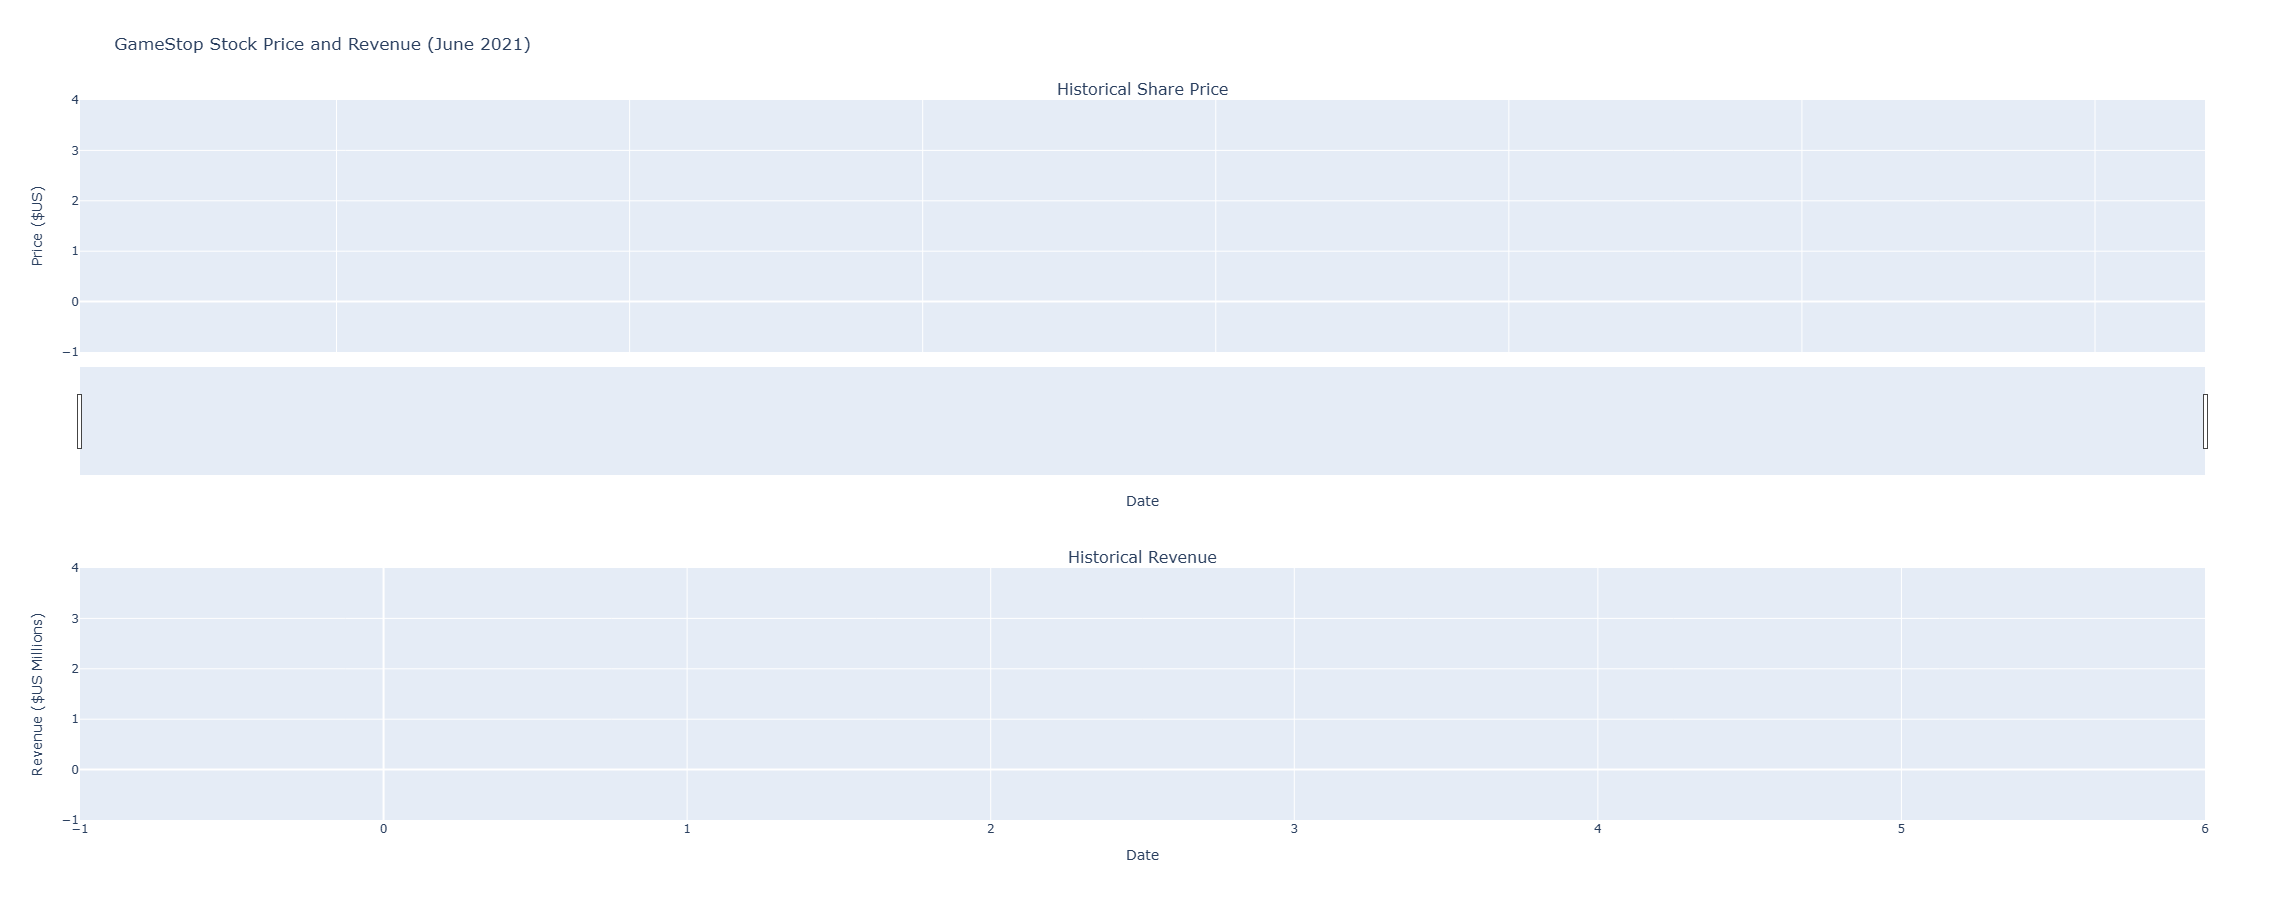

In [45]:
# Create a full date range for June 2021
full_date_range = pd.date_range(start="2021-06-01", end="2021-06-30", freq='D')

# Reindex gme_data_filtered and gme_revenue_filtered to ensure all dates are included
gme_data_filtered = gme_data_filtered.set_index('Date').reindex(full_date_range).reset_index()
gme_data_filtered.rename(columns={'index': 'Date'}, inplace=True)

gme_revenue_filtered = gme_revenue_filtered.set_index('Date').reindex(full_date_range).reset_index()
gme_revenue_filtered.rename(columns={'index': 'Date'}, inplace=True)

# Fill missing values (optional)
gme_data_filtered.fillna(method='ffill', inplace=True)  # Forward-fill stock prices
gme_revenue_filtered.fillna(method='ffill', inplace=True)  # Forward-fill revenue data

# Plot the graph using the make_graph function
make_graph(gme_data_filtered, gme_revenue_filtered, "GameStop Stock Price and Revenue (June 2021)")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
